In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipychart import Chart


In [2]:
purchases_df = pd.read_table("../data/supermarket_purchases", delimiter=" ")
distances_df = pd.read_table("../data/supermarket_distances", delimiter=" ")
prices_df = pd.read_table("../data/supermarket_prices", delimiter=" ")

### **Product popularity**

In [3]:
purchases_df.tail()

,customer_id,product_id,shop_id,quantity
24638720,60365,3894,1,3
24638721,60365,3896,1,1
24638722,60365,3897,1,1
24638723,60366,1514,1,1
24638724,60366,3296,1,1


In [4]:
def visualize_dataset(df):
    df = df.iloc[:10]
    labels = list(df[df.columns[0]].values)
    formatted_dict = {}
    formatted_dict.update({'labels':labels})
    datasets = []
    for column in df.columns[1:]:
        datasets.append({'data':list(df[column].values)})
    formatted_dict.update({'datasets':datasets})
    return formatted_dict

In [5]:
product_purchased_df = purchases_df[['product_id', 'quantity']].groupby('product_id').sum()
product_purchased_df = product_purchased_df.reset_index()

product_purchased_dict = product_purchased_df.iloc[:10].to_dict(orient='list')

product_purchased_dict = visualize_dataset(product_purchased_df)


In [6]:
product_purchased_dict

{'labels': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'datasets': [{'data': [4543,
    13372,
    9734,
    2528,
    11482,
    1009,
    1732,
    1315,
    177,
    199]}]}

In [12]:
mychart = Chart(data=product_purchased_dict, kind='bar')
mychart

Chart(layout=Layout(align_self='stretch', height='auto'))

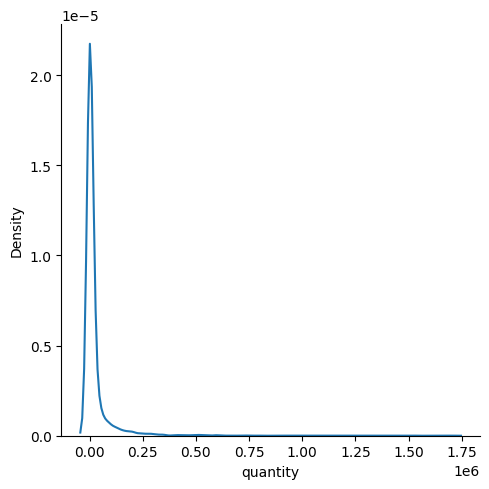

In [8]:
sns.displot(data=product_purchased_df, x='quantity', kind='kde')
plt.show()

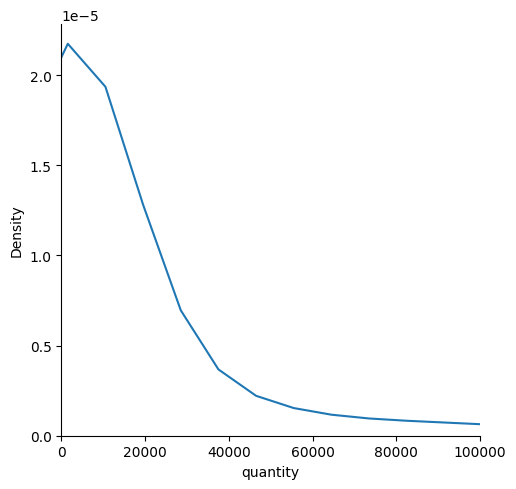

In [9]:
plt.rcParams["figure.figsize"] = (15,15)
sns.displot(data=product_purchased_df, x='quantity', kind='kde')
plt.xlim(0, 100000)
plt.show()

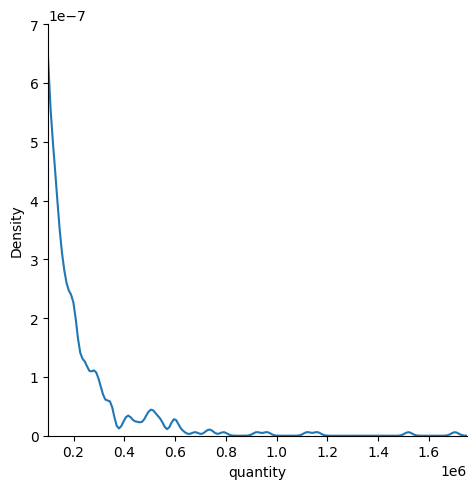

In [10]:
sns.displot(data=product_purchased_df, x='quantity', kind='kde')
plt.xlim(100000,1750000)
plt.ylim(0.000000,0.0000007)

plt.show()

In [11]:
plt.rcParams["figure.figsize"] = (15,10)
sns.set(font_scale = 0.69)
sns.lineplot(data=product_purchased_df, y='quantity', x='product_id')
_ = plt.xticks(rotation=45)
